# Point plot on a map based on timeintervals

To get more spesific information on when and were the incedent occur, we present this with a map over Boston. The point incedents are plotted over different timeinterval on the map. 

## Methods

To be able to plot the data in a specific way, the data needs to be rearranged.

First the necessary python packages are imported to the script. These packages are needed to arrange the data, get an image based on latitude and longitude, and plot the data in an easy way.

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import pandas as pd

The package Pandas is used to import the csv-file and arrange the data in a matrix. We filter out all the columns except "HOUR", "Lat" and "Long", who is needed for the plot. The objects containing a variable value of -1 or none is removed from the dataset. All the object in the same time interval have their "Hour" value set to a common value. The objects are then grouped together on this value into three different groups; 10, 18 and 0.

In [17]:
data = pd.read_csv("crimes.csv", encoding = "ISO-8859-1")

hour_data = data[["HOUR", "Lat", "Long"]]
hour_data.replace(-1, None, inplace=True)
hour_data = hour_data.dropna()

numbers1 = [4,5,6,7,8,9,11]
for n in numbers1:
    hour_data["HOUR"].replace(n, 10, inplace=True)

numbers2 = [12,13,14,15,16,17,19]
for n in numbers2:
    hour_data["HOUR"].replace(n, 18, inplace=True)

numbers3 = [20,21,22,23,1,2,3]
for n in numbers3:
    hour_data["HOUR"].replace(n, 0, inplace=True)

new_data = hour_data.groupby("HOUR")
new_data.get_group(0).Lat


lat1 = new_data.get_group(10).Lat
lon1 = new_data.get_group(10).Long
lat2 = new_data.get_group(18).Lat
lon2 = new_data.get_group(18).Long
lat3 = new_data.get_group(0).Lat
lon3 = new_data.get_group(0).Long

## Results

In the result the data is presented visually in three different point plots on the map of Boston. To distinct the maps from each other different colour is used for the points. One point represents one crime incident, but the colour will be the same even if the points overlap. The opacity of the points is reduced to better see a difference between the maps.

C:\Users\JohnMexico\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-71.25,42.2,-70.85,42.5&bboxSR=4269&imageSR=4269&size=2000,1499&dpi=96&format=png32&transparent=true&f=image


C:\Users\JohnMexico\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-71.25,42.2,-70.85,42.5&bboxSR=4269&imageSR=4269&size=2000,1499&dpi=96&format=png32&transparent=true&f=image


C:\Users\JohnMexico\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-71.25,42.2,-70.85,42.5&bboxSR=4269&imageSR=4269&size=2000,1499&dpi=96&format=png32&transparent=true&f=image


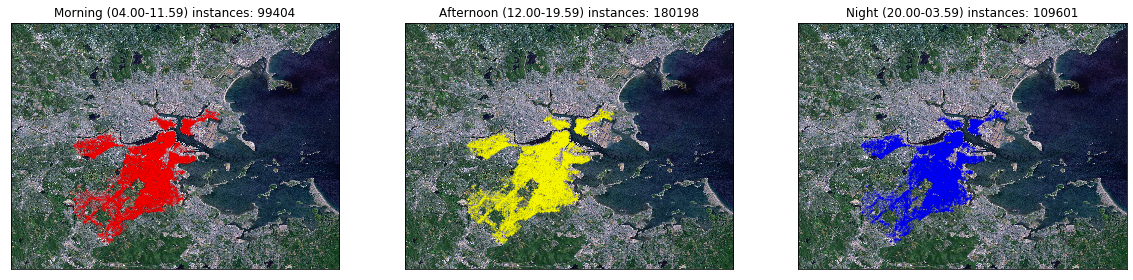

In [20]:
gs = gridspec.GridSpec(1,3)

plt.figure( figsize=(20, 40))
ax1 = plt.subplot(gs[0,0])
ax1.set_title("Morning (04.00-11.59) instances: " + str(lat1.size))
ax2 = plt.subplot(gs[0,1])
ax2.set_title("Afternoon (12.00-19.59) instances: " + str(lat2.size))
ax3 = plt.subplot(gs[0,2])
ax3.set_title("Night (20.00-03.59) instances: " + str(lat3.size))

m1 = Basemap(llcrnrlon=-71.25, llcrnrlat=42.2, urcrnrlon=-70.85, urcrnrlat=42.5, epsg=4269, ax=ax1)
m1.arcgisimage(service="ESRI_Imagery_World_2D", xpixels = 2000, verbose= True)

x, y = m1(lon1, lat1)

ax1.scatter(x, y, 1, marker=".", color="Red", alpha=0.1)

m2 = Basemap(llcrnrlon=-71.25, llcrnrlat=42.2, urcrnrlon=-70.85, urcrnrlat=42.5, epsg=4269, ax=ax2)
m2.arcgisimage(service="ESRI_Imagery_World_2D", xpixels = 2000, verbose= True)

x, y = m2(lon2, lat2)

ax2.scatter(x, y, 1, marker=".", color="Yellow", alpha=0.1)

m3 = Basemap(llcrnrlon=-71.25, llcrnrlat=42.2, urcrnrlon=-70.85, urcrnrlat=42.5, epsg=4269, ax=ax3)
m3.arcgisimage(service="ESRI_Imagery_World_2D", xpixels = 2000, verbose= True)

x, y = m3(lon3, lat3)

ax3.scatter(x, y, 1, marker=".", color="Blue", alpha=0.1)

plt.show()

## Discussion

Visually it can show that the plot for afternoon have the most points by looking at the outside of the city. This can be misleading because a lot of point can overlay each other but not show any difference on the map. The crime incidents in the time interval between 12:00 and 19:59 are almost double the amount of crimes in the two other time intervals, but visually we can't see that big of a difference between the maps.